In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

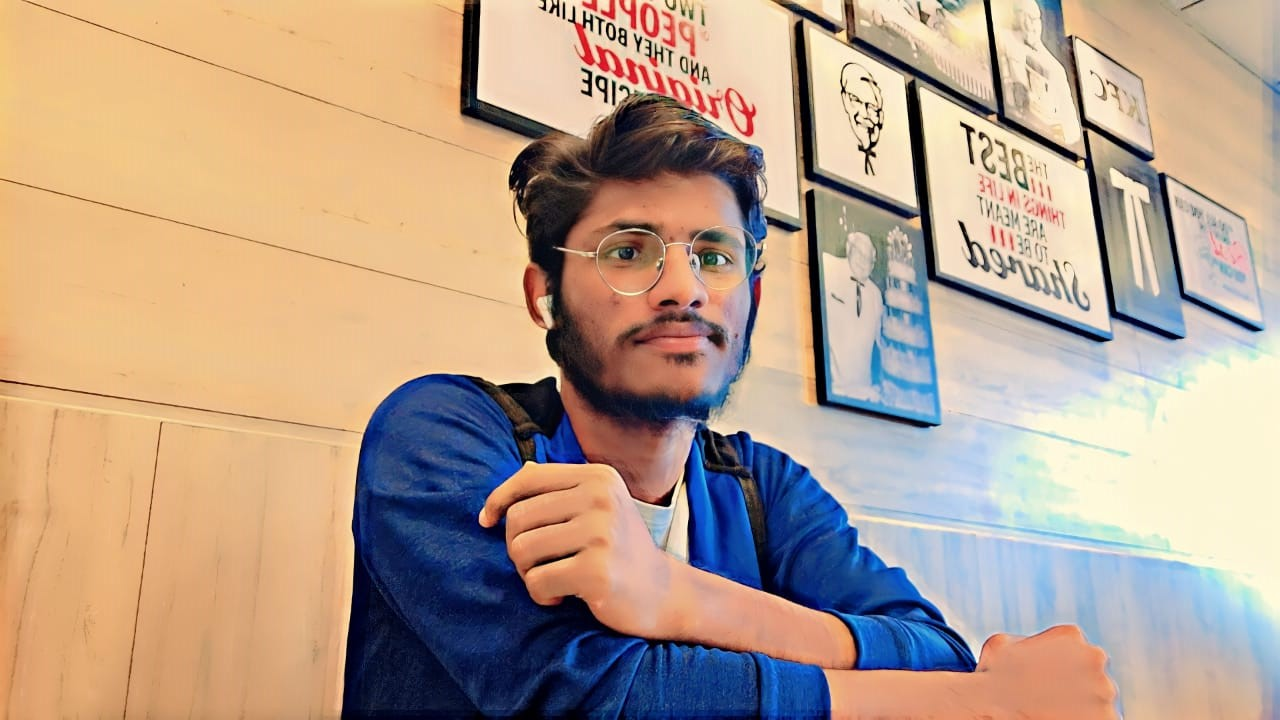

In [2]:
Image(filename = 'image.jpg')

In [3]:
img1 = cv2.imread('image.jpg',0)

#   Print the image data (pixel values), element of a 2D numpy array.
#   Each pixel value is 8-bit [0,255]

print(img1)

[[204 203 203 ... 185 185 186]
 [204 203 203 ... 185 185 186]
 [204 203 203 ... 185 185 186]
 ...
 [171 169 166 ... 143 143 146]
 [171 169 165 ... 143 144 146]
 [171 168 165 ... 143 144 146]]


In [4]:
img2 = cv2.imread('pic.jpg')
img2

array([[[168, 189, 204],
        [166, 187, 202],
        [165, 186, 201],
        ...,
        [183, 196, 198],
        [184, 197, 199],
        [184, 197, 199]],

       [[168, 189, 204],
        [166, 187, 202],
        [166, 187, 202],
        ...,
        [183, 196, 198],
        [183, 196, 198],
        [184, 197, 199]],

       [[167, 188, 203],
        [166, 187, 202],
        [167, 188, 203],
        ...,
        [182, 195, 197],
        [183, 196, 198],
        [183, 196, 198]],

       ...,

       [[196, 224, 248],
        [195, 223, 247],
        [195, 223, 247],
        ...,
        [190, 215, 235],
        [190, 215, 235],
        [190, 215, 235]],

       [[194, 225, 248],
        [194, 225, 248],
        [196, 224, 248],
        ...,
        [190, 215, 235],
        [190, 215, 235],
        [190, 215, 235]],

       [[195, 226, 249],
        [195, 226, 249],
        [197, 225, 249],
        ...,
        [190, 215, 235],
        [190, 215, 235],
        [190, 215, 235]]

###### Display Image attributes

In [5]:
# print the size of image

print('Image size is: ', img1.shape)

#print the datatype of the image
print('Data type of the image is: ',img1.dtype)

Image size is:  (720, 1280)
Data type of the image is:  uint8


In [6]:
# print the size of image

print('Image size is: ', img2.shape)

#print the datatype of the image
print('Data type of the image is: ',img2.dtype)

Image size is:  (1152, 864, 3)
Data type of the image is:  uint8


###### Display Image using Matplotlib

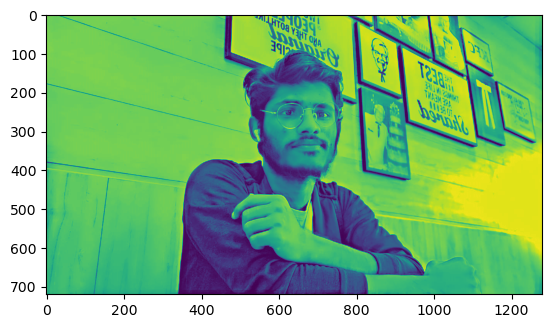

In [7]:
plt.imshow(img1)
# plt.imshow(img2)

Even thought the image was read in as a gray scale image , it won't necessarily display in gray scale
whe using imshow() . matplotlib uses diferent color maps and it's possible that the gray scale map is not set

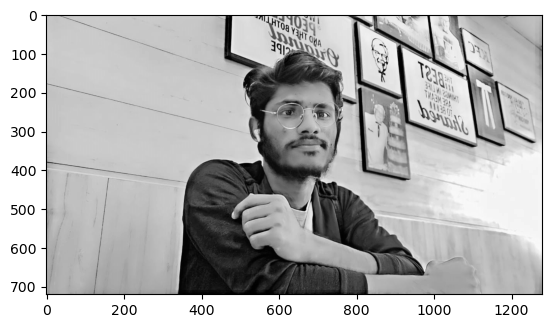

In [8]:
plt.imshow(img1 , cmap = 'gray')

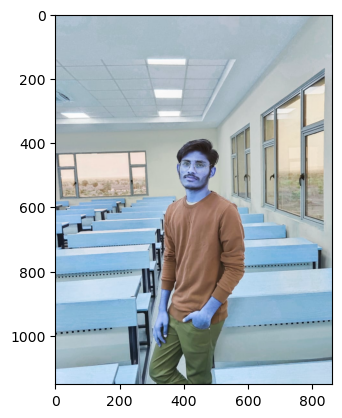

In [9]:
plt.imshow(img2, cmap = 'gray')

[[204 203 203 ... 185 185 186]
 [204 203 203 ... 185 185 186]
 [204 203 203 ... 185 185 186]
 ...
 [171 169 166 ... 143 143 146]
 [171 169 165 ... 143 144 146]
 [171 168 165 ... 143 144 146]]


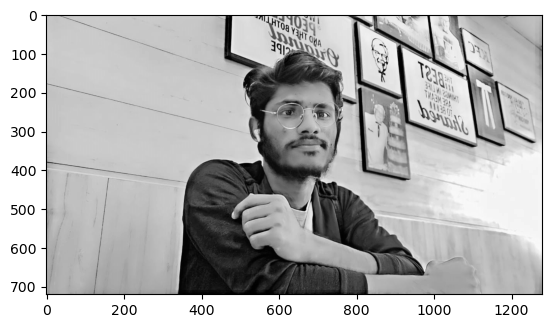

In [10]:
# Read image as gray scale

img1_fuzzy = cv2.imread('image.jpg',0)
print(img1_fuzzy)

plt.imshow(img1_fuzzy, cmap = 'gray')

[[191 189 188 ... 195 196 196]
 [191 189 189 ... 195 195 196]
 [190 189 190 ... 194 195 195]
 ...
 [228 227 227 ... 218 218 218]
 [228 228 228 ... 218 218 218]
 [229 229 229 ... 218 218 218]]


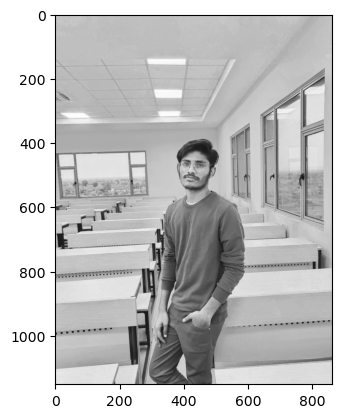

In [11]:
# Read image as gray scale

img2_fuzzy = cv2.imread('pic.jpg',0)
print(img2_fuzzy)

plt.imshow(img2_fuzzy, cmap = 'gray')

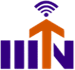

In [12]:
Image(filename = 'iiitn logo.png')

In [13]:
img3 = cv2.imread('iiitn logo.png',1)
print("Image size is: ", img3.shape)
print("Data type of image is: ", img3.dtype)
print("")

Image size is:  (70, 75, 3)
Data type of image is:  uint8



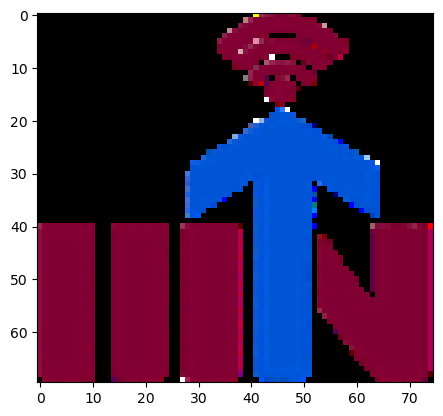

In [14]:
plt.imshow(img3)

 The color displayed aboveis different from the actual image. This is because matplotlib
expects the image in RGB format whereas OpenCv stores images in BGR format. Thus , for correct
display , we need to reverse the channels of the image.

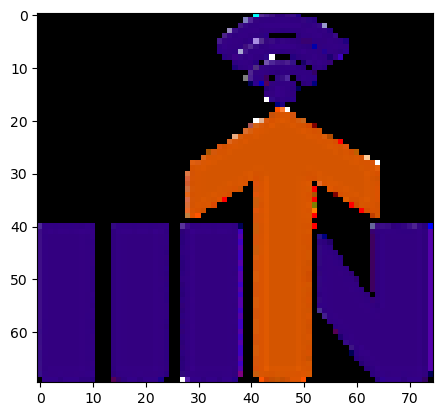

In [15]:
img3_channels_reversed = img3[:,:,::-1]
plt.imshow(img3_channels_reversed)

### Splitting and Merging Color Channels
cv2.split()  Divides a multi-color array into several-channel arrays
cv2.merge()  Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.


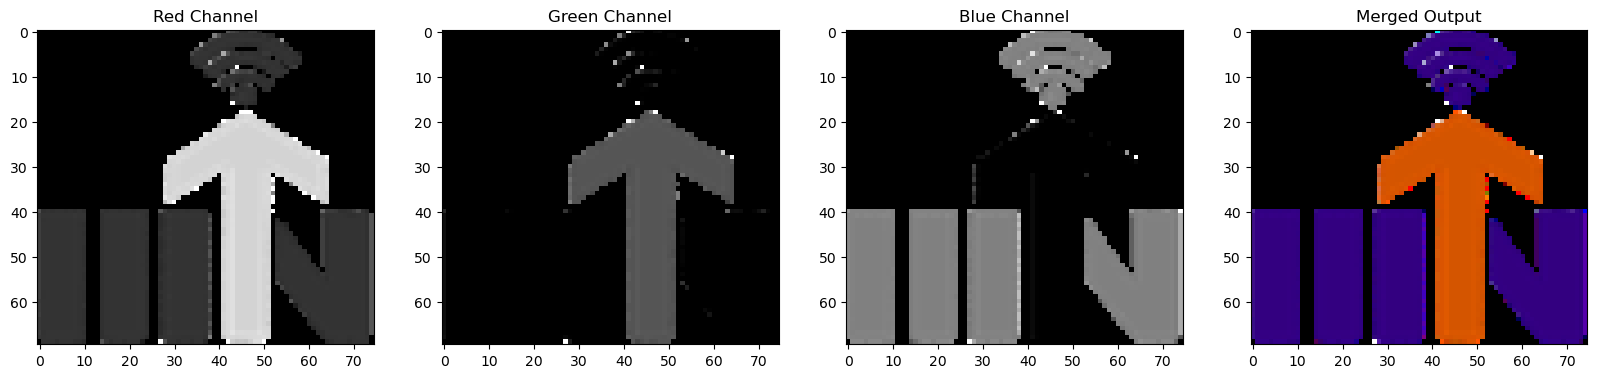

In [16]:
# split the image into the B,G,R components

img3_bgr = cv2.imread('iiitn logo.png',cv2.IMREAD_COLOR)
b,g,r = cv2.split(img3_bgr)

#show the channels

plt.figure(figsize =[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title('Red Channel');
plt.subplot(142);plt.imshow(g,cmap = 'gray');plt.title('Green Channel');
plt.subplot(143);plt.imshow(b,cmap = 'gray');plt.title('Blue Channel');

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b,g,r))

plt.subplot(144);plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output");

###### **  cv2.cvtColor() **
  Converts an image from one color space to another. The funcion convers an input image from  on color space to another. In case of transformation to-from RGB color, space , the order f the channels should be specified (RGB or BRG). Note that the default color format in OpenCv is often reffered as RGB but it actually BGR ( the bytes are reversed). so the first byte in a standard(24-bit) color image will be an 8-bit Blue component,
the second byte will be Green , and the third byte will be Red. The fourth and sixth bytes would then be he second pixel(Blue, then Green, then Red).

# Function Syntax:

**dst = cv2.cvtColor(src, code)**

**dst: **is the output image of the same size and depth as src.

The function has 2 required arguments:

1.**src**   -> input image: 8-bit unsigned  (CV_16UC..), or single-precision floating-poing.

2.**code **color space conversion code(see ColorConversionCodes).

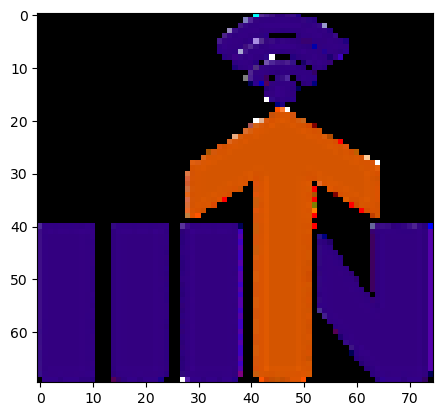

In [17]:
#OpenCv stores color channels in a different order than most other application(BGR vs RGB).
img3_rgb = cv2.cvtColor(img3_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img3_rgb)

In [18]:
# Changing to HSV(high scale volume) color space

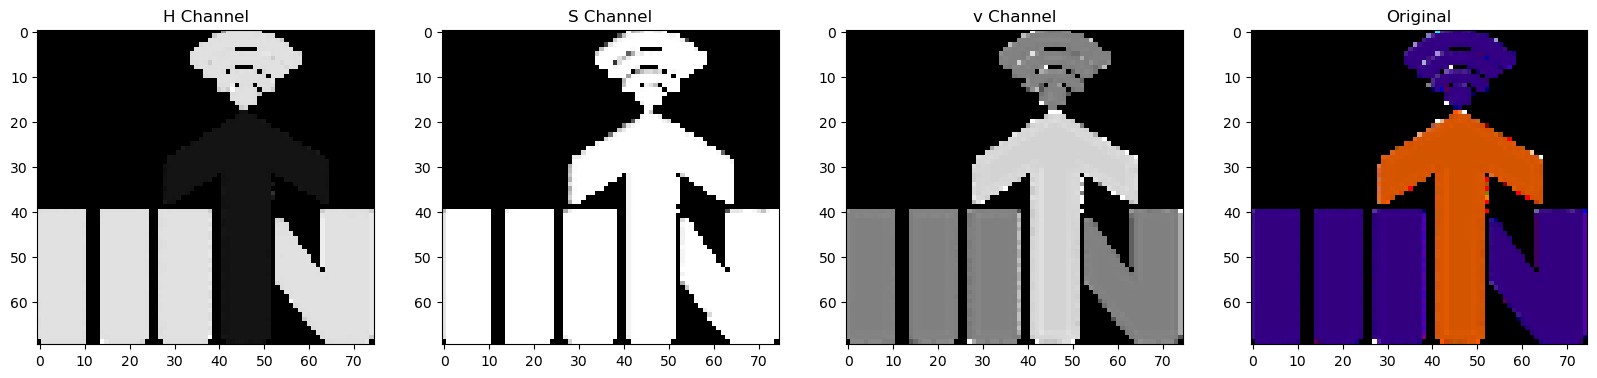

In [19]:
img3_hsv = cv2.cvtColor(img3_bgr , cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img3_hsv)

#show the channels
plt.figure(figsize =[20,5])

plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title('S Channel');
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title('v Channel');
plt.subplot(144);plt.imshow(img3_rgb);plt.title('Original');

In [20]:
# Modifying individual Channels

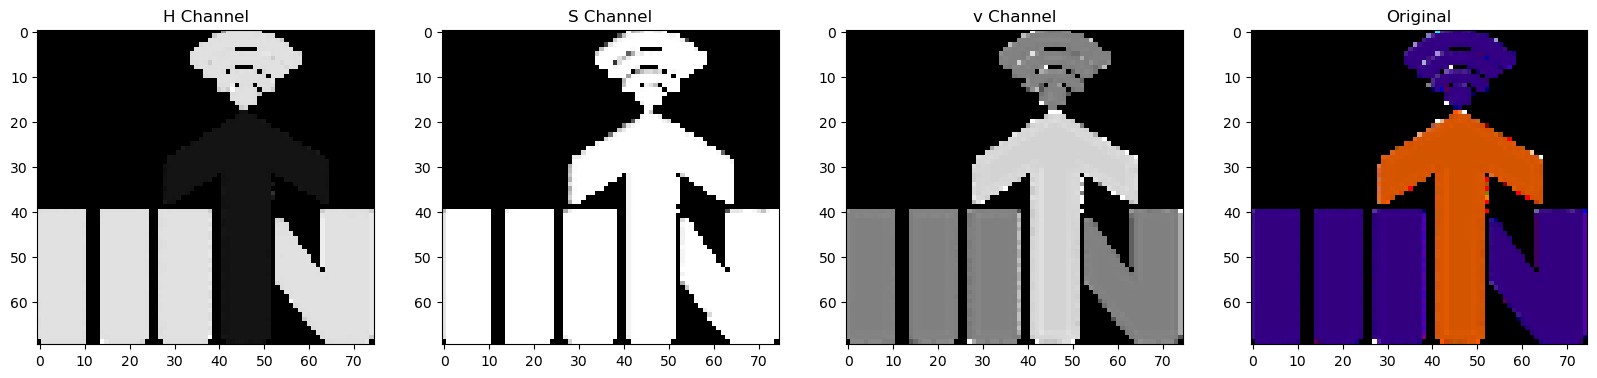

In [21]:
img3_hsv = cv2.cvtColor(img3_bgr , cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img3_hsv)

#show the channels
plt.figure(figsize =[20,5])

plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title('S Channel');
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title('v Channel');
plt.subplot(144);plt.imshow(img3_rgb);plt.title('Original');

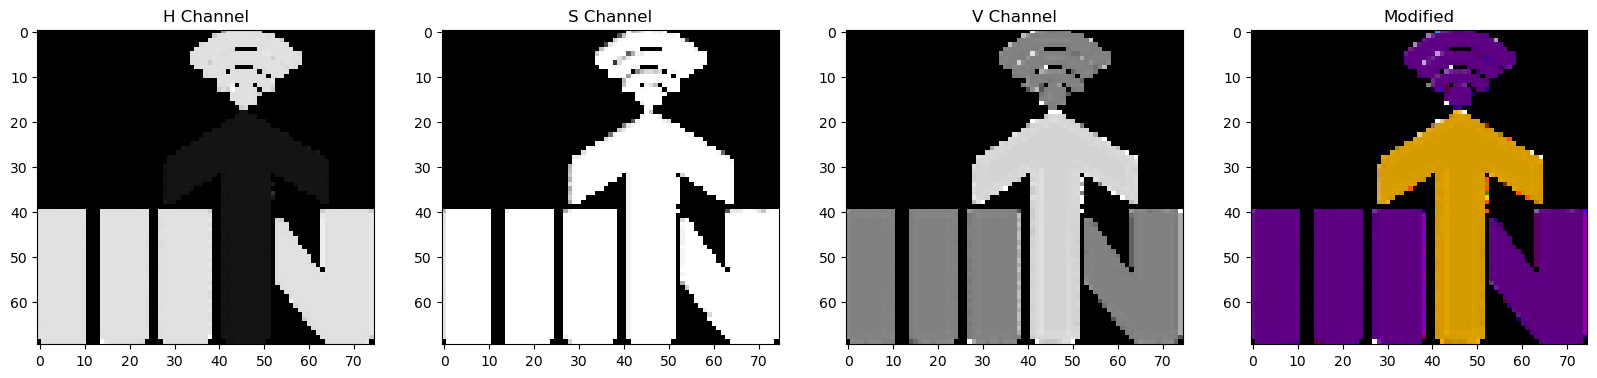

In [22]:
h_new = h+10
img3_merged = cv2.merge((h_new, s,v))
img3_rgb = cv2.cvtColor(img3_merged, cv2.COLOR_HSV2RGB)

# Show the Channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap = 'gray');plt.title('H Channel');
plt.subplot(142);plt.imshow(s,cmap = 'gray');plt.title('S Channel');
plt.subplot(143);plt.imshow(v, cmap = 'gray');plt.title('V Channel');
plt.subplot(144);plt.imshow(img3_rgb);plt.title("Modified");

In [23]:
# Save the Image

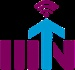

In [24]:
cv2.imwrite("img4.jpg",img3_rgb)
Image(filename = "img4.jpg")

In [25]:
# read the image as color
img4_bgr = cv2.imread('img4.jpg',cv2.IMREAD_COLOR)
print("img4 shape is: ", img4_bgr.shape)

#read the image as Grayscaled
img_gry = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)
print("img4_gry shape is: ", img4_bgr.shape)

img4 shape is:  (70, 75, 3)
img4_gry shape is:  (70, 75, 3)


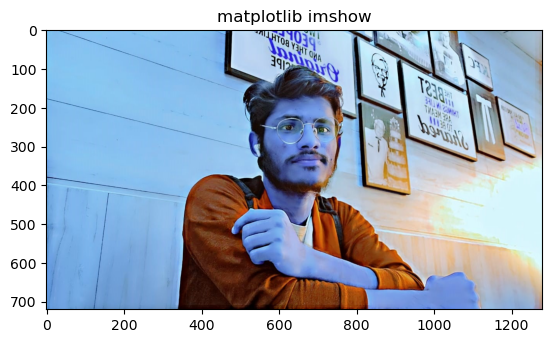

In [26]:
import cv2 
import matplotlib.pyplot as plt

x = cv2.imread('image.jpg')
x2 = cv2.imread('pic.jpg')

#use matplotlib imshow()
plt.imshow(x)
plt.title('matplotlib imshow')
plt.show()


In [27]:
#use OpenCv imshow(), display for 8 sec
import cv2

windows1 = cv2.namedWindow("w1")
cv2.imshow(windows1, x)
cv2.waitKey(8000)
cv2.destroyWindow(windows1)

In [31]:
#use OpenCv imshow(), display for 8 sec
import cv2

windows2 = cv2.namedWindow("w2")
cv2.imshow(windows1, x2)
cv2.waitKey(8000)
cv2.destroyWindow(windows2)

In [32]:
windows3 = cv2.namedWindow("w3")
cv2.imshow(windows3,x)
cv2.waitKey(0)
cv2.destroyWindow(windows3)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: '' in function 'cvDestroyWindow'


In [ ]:
windows4 = cv2.namedWindow("w4")
Alive = True
while Alive:
    # use OpenCv imshow(),  display until 'q' key is pressed
    
    cv2.imshow(windows4, x2)
    keypress = cv2.waitKey(1)
    if keypress == ord('q'):
        Alive = False
        
cv2.destroyWindow(windows4)

cv2.destroyAllWindows()
stop = 1